In [7]:
import numpy as np
import os

basedir = "/cbscratch/franco/trans-eqtl/dev-pipeline/precorr"

outdir = basedir+"/lmcorrected_age_precorr/gtex-ms/tejaas/permnull_sb0.05/"
outdir_random = basedir +"/lmcorrected_age_precorr/gtex-ms/tejaas_rand/permnull_sb0.05/"

outdir_norm = basedir +"/norm/gtex-ms/tejaas/permnull_sb0.05/"
outdir_norm_random = basedir +"/norm/gtex-ms/tejaas_rand/permnull_sb0.05/"

#outdir_peer = "/scratch/sbanerj/trans-eqtl/dev-pipeline/gtex-ms_35peer/tejaas/permnull_sb0.01/chr7"
#outfiles_peer = glob.glob( outdir_peer + "/chunk*_rr.txt")

In [8]:
def read_tejaas_rr_pvals(filename):
    print("Loading ", filename)
    pvals = list()
    with open(filename, "r") as mfile:
        next(mfile)
        for line in mfile:
            pvals.append(float(line.split()[5]))
    pvals = np.array(pvals)
    return pvals

pvals = np.array([])
pvals_random = np.array([])
pvals_norm = np.array([])
pvals_norm_random = np.array([])
pvals_norm_ld = np.array([])
pvals_norm_ld_random = np.array([])
for chrm in range(6,8):
    outfile = os.path.join(outdir+"chr"+str(chrm), "rr.txt")
    outfile_random = os.path.join(outdir_random+"chr"+str(chrm), "rr.txt")
    pvals = np.append(pvals, read_tejaas_rr_pvals(outfile))
    pvals_random = np.append(pvals_random, read_tejaas_rr_pvals(outfile_random))
    
    outfile_norm_ld = os.path.join(outdir_norm+"chr"+str(chrm), "rr.txt.ld")
    outfile_norm_ld_random = os.path.join(outdir_norm_random+"chr"+str(chrm), "rr.txt.ld")
    pvals_norm_ld = np.append(pvals_norm_ld, read_tejaas_rr_pvals(outfile_norm_ld))
    pvals_norm_ld_random = np.append(pvals_norm_ld_random, read_tejaas_rr_pvals(outfile_norm_ld_random))
    
    outfile_norm = os.path.join(outdir_norm+"chr"+str(chrm), "rr.txt")
    outfile_norm_random = os.path.join(outdir_norm_random+"chr"+str(chrm), "rr.txt")
    pvals_norm = np.append(pvals_norm, read_tejaas_rr_pvals(outfile_norm))
    pvals_norm_random = np.append(pvals_norm_random, read_tejaas_rr_pvals(outfile_norm_random))

Loading  /cbscratch/franco/trans-eqtl/dev-pipeline/precorr/lmcorrected_age_precorr/gtex-ms/tejaas/permnull_sb0.05/chr6/rr.txt
Loading  /cbscratch/franco/trans-eqtl/dev-pipeline/precorr/lmcorrected_age_precorr/gtex-ms/tejaas_rand/permnull_sb0.05/chr6/rr.txt
Loading  /cbscratch/franco/trans-eqtl/dev-pipeline/precorr/norm/gtex-ms/tejaas/permnull_sb0.05/chr6/rr.txt.ld
Loading  /cbscratch/franco/trans-eqtl/dev-pipeline/precorr/norm/gtex-ms/tejaas_rand/permnull_sb0.05/chr6/rr.txt.ld
Loading  /cbscratch/franco/trans-eqtl/dev-pipeline/precorr/norm/gtex-ms/tejaas/permnull_sb0.05/chr6/rr.txt
Loading  /cbscratch/franco/trans-eqtl/dev-pipeline/precorr/norm/gtex-ms/tejaas_rand/permnull_sb0.05/chr6/rr.txt
Loading  /cbscratch/franco/trans-eqtl/dev-pipeline/precorr/lmcorrected_age_precorr/gtex-ms/tejaas/permnull_sb0.05/chr7/rr.txt
Loading  /cbscratch/franco/trans-eqtl/dev-pipeline/precorr/lmcorrected_age_precorr/gtex-ms/tejaas_rand/permnull_sb0.05/chr7/rr.txt
Loading  /cbscratch/franco/trans-eqtl/dev-

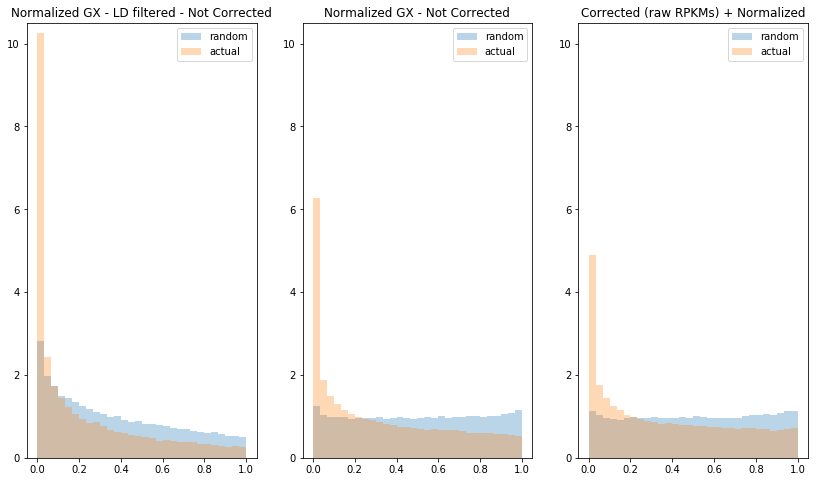

In [12]:
import matplotlib.pyplot as plt
import sys

fig = plt.figure(figsize=(14,8))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)

ax1.hist(pvals_norm_ld_random, bins=30, density=True, alpha=0.3, label="random")
ax1.hist(pvals_norm_ld, bins=30, density=True, alpha=0.3, label="actual")
ax1.legend()
ax1.set_title("Normalized GX - LD filtered - Not Corrected")
ax1.set_ylim(0,10.5)

ax2.hist(pvals_norm_random, bins=30, density=True, alpha=0.3, label="random")
ax2.hist(pvals_norm, bins=30, density=True, alpha=0.3, label="actual")
ax2.legend()
ax2.set_title("Normalized GX - Not Corrected")
ax2.set_ylim(0,10.5)

ax3.hist(pvals_random, bins=30, density=True, alpha=0.3, label="random")
ax3.hist(pvals, bins=30, density=True, alpha=0.3, label="actual")
ax3.legend()
ax3.set_title("Corrected (raw RPKMs) + Normalized")
ax3.set_ylim(0,10.5)

plt.show()